In [13]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [14]:
# Read the uploaded file into a DataFrame
df = pd.read_csv('AB_NYC_2019.csv')

In [15]:
# Display original data
print("Original Data:")
print(df.head())

Original Data:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1        

In [16]:
# Remove duplicates
df = df.drop_duplicates()

In [18]:
# Handle missing values (impute with mean for numerical columns, mode for categorical columns)
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)
df['last_review'].fillna(df['last_review'].mode()[0], inplace=True)

<ipython-input-18-f9dd269048a5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)
<ipython-input-18-f9dd269048a5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [19]:

# Standardize 'name' and 'host_name' formats (capitalize)
df['name'] = df['name'].str.title()
df['host_name'] = df['host_name'].str.title()

In [20]:
# Detect and handle outliers in 'price' (e.g., price > 3 standard deviations from mean)
mean_price = df['price'].mean()
std_price = df['price'].std()
outliers = df[(df['price'] > mean_price + 3 * std_price) | (df['price'] < mean_price - 3 * std_price)]
df = df[~df.index.isin(outliers.index)]

In [21]:
# Display cleaned data
print("\nCleaned Data:")
print(df.head())


Cleaned Data:
     id                                              name  host_id  \
0  2539                Clean & Quiet Apt Home By The Park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               The Village Of Harlem....New York !     4632   
3  3831                   Cozy Entire Floor Of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft By Central Park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  Lisaroxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1        

In [22]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

<ipython-input-24-c95501e7dc2b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_type', y='price', palette='Set2')


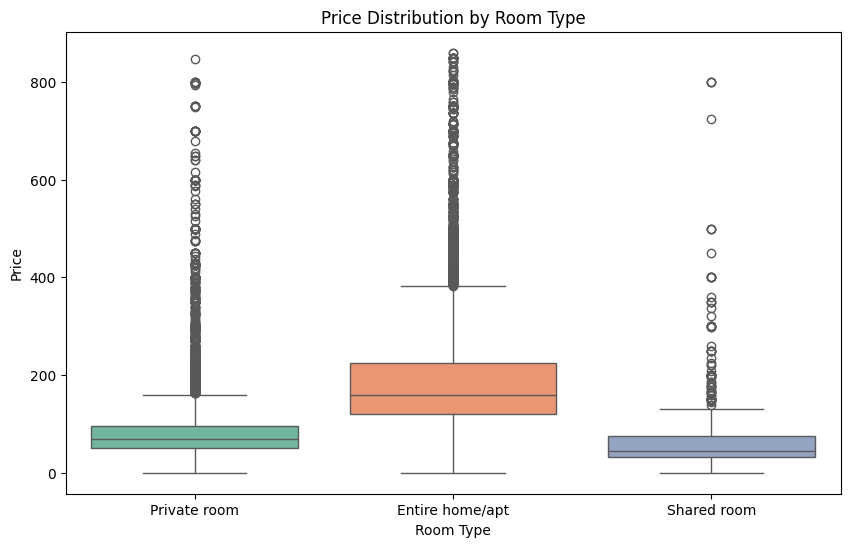

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Box Plot: Price distribution by room type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='room_type', y='price', palette='Set2')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

<ipython-input-25-d32879d0192b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', palette='viridis')


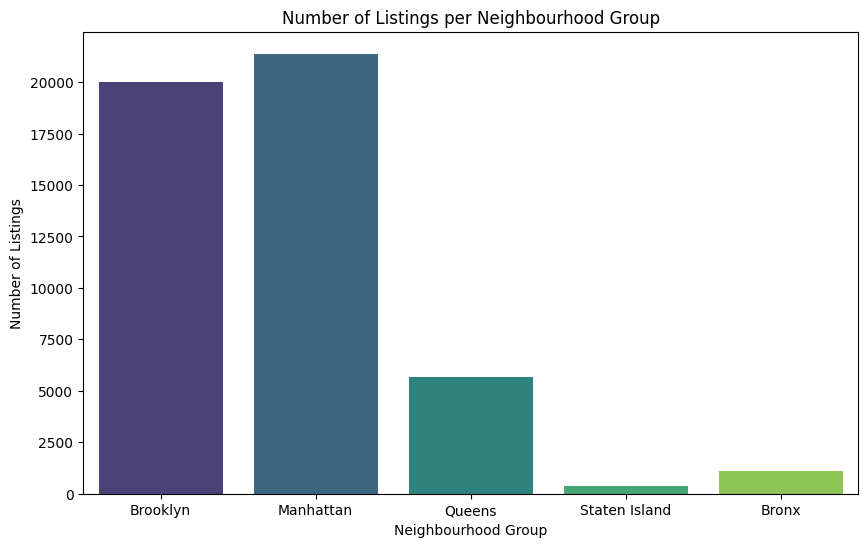

In [25]:
# Bar Plot: Number of listings per neighbourhood group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', palette='viridis')
plt.title('Number of Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()

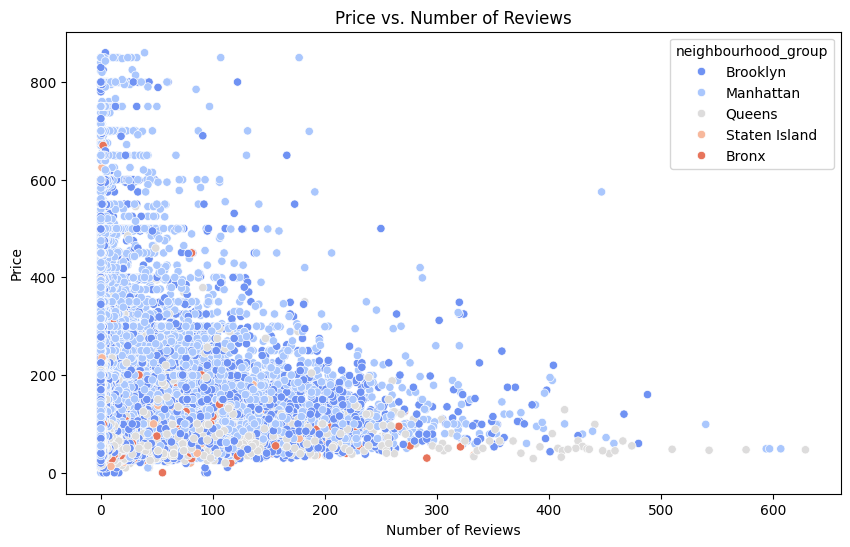

In [26]:
# Scatter Plot: Price vs. Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='neighbourhood_group', palette='coolwarm')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()
